In [17]:
example_list_of_dicts = [
    {'name': 'John', 'age': 25},
    {'name': 'Jane', 'age': 22},
    {'name': 'Tom', 'age': 32}
]

for dict in example_list_of_dicts:
    print(dict['name'])

(31670,)


(-20.0, 20.0)

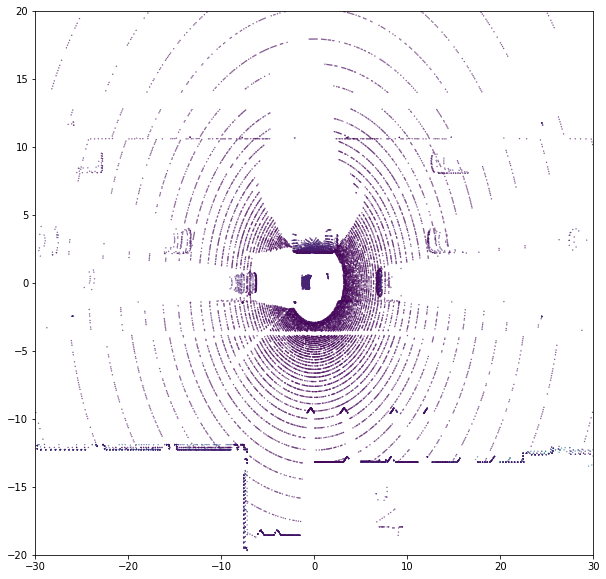

In [30]:
import laspy
import laszip
import lazrs
import matplotlib.pyplot as plt
import numpy as np

# PATH = "/home/nupdm/workspace/pdm_lite/logs/routes_devtest_routeroutes_devtest_route0_01_21_13_51_25_01_21_13_51_25/lidar/0010.laz"
# PATH = "/home/nupdm/workspace/pdm_lite/logs/Ruta Devtest completa ORIG/lidar/0003.laz"
# PATH = "/home/nupdm/workspace/pdm_lite/logs/Ruta Devtest Completa 6 cams bien K T/lidar/0005.laz"
# POINTS = "/home/nupdm/Datasets/nuPDM/routes_training_mini/route_0_routes_training_date_03_04_13_55_31/lidar/0001.laz"
POINTS = "/home/nupdm/Datasets/nuPDM/routes_training_test_copy/route_route0_routes_training_date_03_12_12_38_34/lidar/0001.laz"

# open las file
# las = laspy.read(PATH)

# print points
# print(las.points)

with laspy.open(POINTS) as f:
    points = f.read()

x = points['X']
y = points['Y']
z = points['Z']
i = points['intensity']

x = x/1000+f.header.offset[0]
y = y/1000+f.header.offset[1]
z = z/1000+f.header.offset[2]

print(x.shape)

# show in a plot
fig = plt.figure(figsize=(10,10))
plt.scatter(x, -y, c=z, s=0.1)
plt.xlim([-30, 30])
plt.ylim([-20, 20])

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# PATH = "/home/nupdm/workspace/pdm_lite/logs/routes_devtest_routeroutes_devtest_route0_01_21_13_51_25_01_21_13_51_25/lidar/0010.laz"
# PATH = "/home/nupdm/workspace/pdm_lite/logs/Ruta Devtest completa ORIG/lidar/0003.laz"
# PATH = "/home/nupdm/workspace/pdm_lite/logs/Ruta Devtest Completa 6 cams bien K T/lidar/0005.laz"
# POINTS = "/home/nupdm/Datasets/nuPDM/routes_training_mini/route_0_routes_training_date_03_04_13_55_31/points/0001.bin"
POINTS = "/home/nupdm/Datasets/nuPDM/routes_training_new_mini_v2/route_route0_routes_training_date_06_17_08_38_19/points/0001.bin"

# open bin file
pcd = np.fromfile(POINTS, dtype=np.float32)
pcd = pcd.reshape(-1, 4)

x = pcd[:, 0]
y = pcd[:, 1]
z = pcd[:, 2]
i = pcd[:, 3]

print(x.shape)

# rotate pcd 90 degrees positive
# x, y = y, -x

# show with plt scatter

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=i, s=0.1)
plt.xlim([-30, 30])
plt.ylim([-20, 20])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/nupdm/Datasets/nuPDM/routes_training_new_mini_v2/route_route0_routes_training_date_06_17_08_38_19/points/0001.bin'

Current path: /home/nupdm/workspace
(31493,)


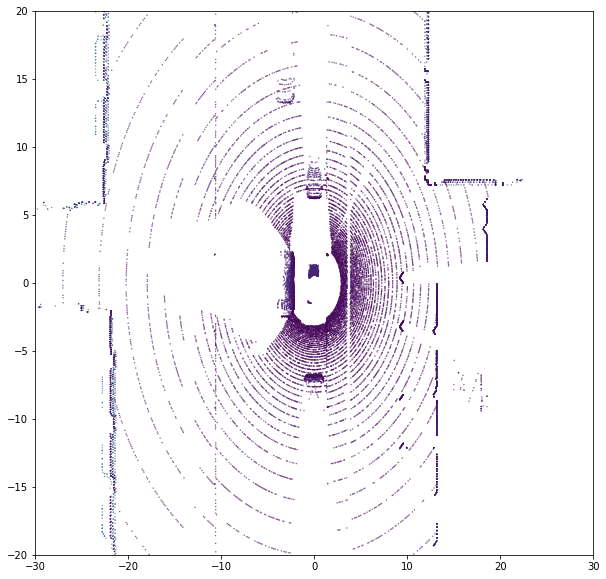

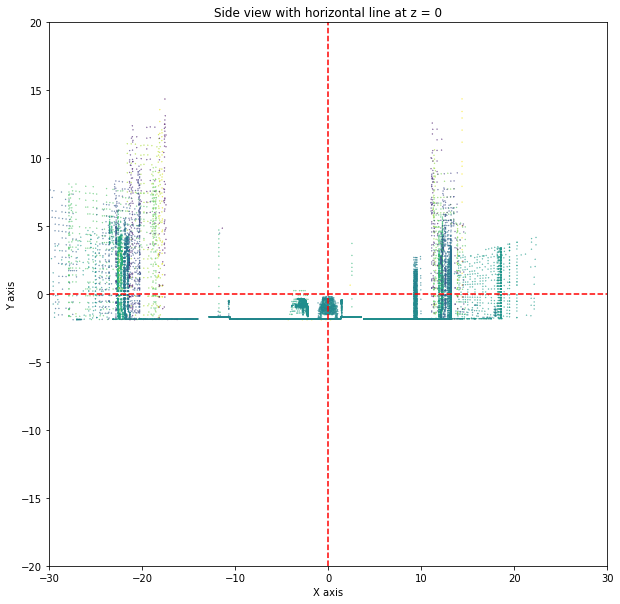

In [6]:
import numpy as np
import os
# get path

# get actual path with os
current_path = os.getcwd()

print("Current path:", current_path)

POINTS = "/home/nupdm/workspace/lidar.npy"

# open npy file
pcd = np.load(POINTS)
x = pcd[:, 0]
y = pcd[:, 1]
z = pcd[:, 2]
print(x.shape)

import matplotlib.pyplot as plt

# show in matplotlib
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=z, s=0.1)
plt.xlim([-30, 30])
plt.ylim([-20, 20])
plt.show()

# show side view with a horizontal line in z = 0
fig = plt.figure(figsize=(10,10))
plt.scatter(x, z, c=y, s=0.1)
plt.xlim([-30, 30])
plt.ylim([-20, 20])
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.title("Side view with horizontal line at z = 0")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [19]:
# semantic palette goes from 0 to 24
SEMANTIC_PALETTE = {
    0: [0, 0, 0], # None
    1: [128, 64, 128], # Roads
    2: [244, 35, 232], # Sidewalks
    3: [70, 70, 70], # Building
    4: [102, 102, 156], # Wall
    5: [190, 153, 153], # Fence
    6: [153, 153, 153], # Pole
    7: [250, 170, 30], # TrafficLight
    8: [220, 220, 0], # TrafficSign
    9: [107, 142, 35], # Vegetation
    10: [152, 251, 152], # Terrain
    11: [70, 130, 180], # Sky
    12: [220, 20, 60], # Pedestrian
    13: [255, 0, 0], # Rider
    14: [0, 0, 142], # Car
    15: [0, 0, 70], # Truck
    16: [0, 60, 100], # Bus
    17: [0, 80, 100], # Train
    18: [0, 0, 230], # Motorcycle
    19: [119, 11, 32], # Bicycle
    20: [110, 190, 160], # Static
    21: [170, 120, 50], # Dynamic
    22: [55, 90, 80], # Other
    23: [45, 60, 150], # Water
    24: [157, 234, 50], # RoadLine
    25: [81, 0, 81], # Ground
    26: [150, 100, 100], # Bridge
    27: [230, 150, 140], # RailTrack
    28: [180, 165, 180], # GuardRail
}

In [20]:
import laspy
import laszip
import lazrs
import matplotlib.pyplot as plt
import numpy as np
import json
import gzip
import matplotlib.patches as patches
import matplotlib.transforms as transforms

# 0085 puerta abierta
# 0276 ciclista
# 0365 pedestrian NO
# 0470 unexpected

ITEM = "0998"
# FOLDER = "Ruta Devtest a medias 6 cams"
DATAROOT = "/home/nupdm/workspace/Datasets/PDM_Lite_FSG/devtest_full_6_cams"

PATH_SEM_LIDAR = f"{DATAROOT}/lidar_semantic/{ITEM}.laz"
PATH_LIDAR = f"{DATAROOT}/lidar/{ITEM}.laz"
PATH_WPS = f"{DATAROOT}/measurements/{ITEM}.json.gz"
PATH_CAM_FRONT = f"{DATAROOT}/CAM_FRONT/{ITEM}.jpg"
PATH_CAM_FRONT_LEFT = f"{DATAROOT}/CAM_FRONT_LEFT/{ITEM}.jpg"
PATH_CAM_FRONT_RIGHT = f"{DATAROOT}/CAM_FRONT_RIGHT/{ITEM}.jpg"
PATH_CAM_BACK = f"{DATAROOT}/CAM_BACK/{ITEM}.jpg"
PATH_CAM_BACK_LEFT = f"{DATAROOT}/CAM_BACK_LEFT/{ITEM}.jpg"
PATH_CAM_BACK_RIGHT = f"{DATAROOT}/CAM_BACK_RIGHT/{ITEM}.jpg"
PATH_BOX = f"{DATAROOT}/boxes/{ITEM}.json.gz"

with laspy.open(PATH_SEM_LIDAR) as f:
    points = f.read()

x = points['X']
y = points['Y']
z = points['Z']
cos_alpha = points['cos_alpha']
instance_id = points['instance_id']
semantic_tag = points['semantic_tag']

#print shape
print(x.shape)
# unique instance idsW
print(np.unique(instance_id))
# unique semantic tags
print(np.unique(semantic_tag))

# create a colors array with the same elements as semantic tag but with the color of the semantic tag. Values should be between 0 and 1
colors = np.zeros((semantic_tag.shape[0], 3))
for i in range(semantic_tag.shape[0]):
    colors[i] = np.array(SEMANTIC_PALETTE[semantic_tag[i]]) / 255

# map each instance id to a different random color
instance_id_palette = {}
for instance in np.unique(instance_id):
    instance_id_palette[instance] = np.random.rand(3)

# convert to array to use in scatter
instance_id_palette = np.array([instance_id_palette[instance] for instance in instance_id])

# # show in a plot with colors based on semantic tag of palette
# fig = plt.figure(figsize=(20,20))
# # plt.scatter((x/1000+f.header.offset[0]), -(y/1000+f.header.offset[1]), c=colors, s=0.2)
# plt.scatter((y/1000+f.header.offset[1]), (x/1000+f.header.offset[0]), c=colors, s=0.2)
# plt.xlim([-40, 40])
# plt.ylim([-40, 40])

# put the above scatter in a subplot with the same scatter but with c=colors
fig, axs = plt.subplots(1, 2, figsize=(30, 15))
axs[0].scatter((y/1000+f.header.offset[1]), (x/1000+f.header.offset[0]), c=colors, s=0.2)
axs[1].scatter((y/1000+f.header.offset[1]), (x/1000+f.header.offset[0]), c=instance_id_palette, s=0.2)
axs[0].set_xlim([-40, 40])
axs[1].set_xlim([-40, 40])
axs[0].set_ylim([-40, 40])
axs[1].set_ylim([-40, 40])

# load wps
with gzip.open(PATH_WPS, 'rt', encoding='utf-8') as f:
    data = json.load(f)

theta_deg = (data['theta'] - np.pi/2)*180/np.pi

# show route points in both subplots above
route = np.array(data['route'])
# plot one point each 4
# axs[0].plot(route[::4,1], route[::4,0], 'ro')
# axs[1].plot(route[::4,1], route[::4,0], 'ro')
axs[0].plot(route[:,1], route[:,0], 'ro')
axs[1].plot(route[:,1], route[:,0], 'ro')

# load boxes
with gzip.open(PATH_BOX, 'rt', encoding='utf-8') as f:
    data = json.load(f)

# show boxes in the plot
boxes_positions = []
boxes_extents = []
boxes_yaws = []
boxes_ids = []
for box in data:
    if box['class'] != 'weather' and box['class'] != "ego_car" and box['class'] != "ego_info" and box['class'] != "landmark":
        boxes_positions.append([box['position'][1], box['position'][0]])
        boxes_extents.append([box['extent'][1], box['extent'][0]])
        boxes_yaws.append(box['yaw'])
        if 'id' in box:
            boxes_ids.append(box['id'])
        else:
            boxes_ids.append("")

# show boxes in the plot and add id as text
for i in range(len(boxes_positions)):
    # box = plt.Rectangle((boxes_positions[i][0] - boxes_extents[i][0], boxes_positions[i][1] - boxes_extents[i][1]), boxes_extents[i][0]*2, boxes_extents[i][1]*2, angle=-boxes_yaws[i]*180/np.pi, edgecolor='r', facecolor='none')
    box = plt.Rectangle((boxes_positions[i][0] - boxes_extents[i][0], boxes_positions[i][1] - boxes_extents[i][1]), boxes_extents[i][0]*2, boxes_extents[i][1]*2, angle=0, edgecolor='r', facecolor='none')
    if boxes_ids[i] != "":
        axs[0].text(boxes_positions[i][0], boxes_positions[i][1], boxes_ids[i], fontsize=12, color='r')
    axs[0].add_patch(box)

for i in range(len(boxes_positions)):
    # box = plt.Rectangle((boxes_positions[i][0] - boxes_extents[i][0], boxes_positions[i][1] - boxes_extents[i][1]), boxes_extents[i][0]*2, boxes_extents[i][1]*2, angle=-boxes_yaws[i]*180/np.pi, edgecolor='r', facecolor='none')
    box = plt.Rectangle((boxes_positions[i][0] - boxes_extents[i][0], boxes_positions[i][1] - boxes_extents[i][1]), boxes_extents[i][0]*2, boxes_extents[i][1]*2, angle=0, edgecolor='r', facecolor='none')
    if boxes_ids[i] != "":
        axs[1].text(boxes_positions[i][0], boxes_positions[i][1], boxes_ids[i], fontsize=12, color='r')
    axs[1].add_patch(box)

plt.tight_layout()
plt.show()

# load each camera image and show in plt figure with 6 figures
fig, axs = plt.subplots(2, 3, figsize=(30, 15))
axs[0, 1].imshow(plt.imread(PATH_CAM_FRONT))
axs[0, 1].set_title("CAM_FRONT")
axs[0, 0].imshow(plt.imread(PATH_CAM_FRONT_LEFT))
axs[0, 0].set_title("CAM_FRONT_LEFT")
axs[0, 2].imshow(plt.imread(PATH_CAM_FRONT_RIGHT))
axs[0, 2].set_title("CAM_FRONT_RIGHT")

# show back cameras flipped
axs[1, 1].imshow(np.fliplr(plt.imread(PATH_CAM_BACK)))
axs[1, 1].set_title("CAM_BACK")
axs[1, 0].imshow(np.fliplr(plt.imread(PATH_CAM_BACK_LEFT)))
axs[1, 0].set_title("CAM_BACK_LEFT")
axs[1, 2].imshow(np.fliplr(plt.imread(PATH_CAM_BACK_RIGHT)))
axs[1, 2].set_title("CAM_BACK_RIGHT")
plt.tight_layout()
for ax in axs.flat:
    ax.axis('off')
plt.show()

# Las salidas del modelo deberían ser WPs y un vector one-hot encoded de velocidades.

In [ ]:
import os
import cv2
np.set_printoptions(precision=3, suppress=True)
# draw 3d bbox in cam front vehicles

MEASUREMENTS_PATH = f"{DATAROOT}/measurements/{ITEM}.json.gz"
BOXES_PATH = f"{DATAROOT}/boxes/{ITEM}.json.gz"

# load measurements
with gzip.open(os.path.join(MEASUREMENTS_PATH), "rb") as f:
    measurements = json.load(f)

# load boxes
with gzip.open(os.path.join(BOXES_PATH), "rb") as f:
    boxes = json.load(f)

# camera K matrix
cam_front_K = np.array(boxes[0]["cam_front_K"])
cam_front_T = np.array(boxes[0]["cam_front_T"])

agent_position = np.array(boxes[1]["position"])
agent_extent = np.array(boxes[1]["extent"]) * 2
agent_yaw = boxes[1]["yaw"]

# get vertices ----------------------------
R = np.array([
    [np.cos(agent_yaw), -np.sin(agent_yaw), 0],
    [np.sin(agent_yaw), np.cos(agent_yaw), 0],
    [0, 0, 1]
])

l, w, h = agent_extent
x, y, z = agent_position

vertices_3d = np.array([
    [l/2, w/2, -h],
    [l/2, w/2, 0],
    [l/2, -w/2, -h],
    [l/2, -w/2, 0],
    [-l/2, w/2, -h],
    [-l/2, w/2, 0],
    [-l/2, -w/2, -h],
    [-l/2, -w/2, 0],
])

# move to agent position
# vertices_global = vertices_3d + agent_position

vertices = (R @ vertices_3d.T).T + agent_position
# vertices = vertices_3d + agent_position

print(f"Vertices 1:\n{vertices}")

# to camera coord (cam_front_T)
# vertices_h = np.hstack([vertices, np.ones((8, 1))])
# vertices = np.dot(cam_front_T, vertices_h.T).T[:, :3] # not needed since agent position is in global

print(f"Vertices 2:\n{vertices}")

# change from (x, y, z, 1) to (y, -z, x)
vertices = vertices[:, [1, 2, 0]]
vertices[:, 1] = -vertices[:, 1]


print(f"Vertices 3:\n{vertices}")

vertices_img = np.dot(cam_front_K, vertices.T).T
vertices_img[:, 0] /= vertices_img[:, 2]
vertices_img[:, 1] /= vertices_img[:, 2]
vertices_img = vertices_img[:, :2].astype(int)

print(f"Vertices img:\n{vertices_img}")

edges = [[0,1], [1,3], [3,2], [2,0], [0,4], [4,5], [5,1], [5,7], [7,6], [6,4], [6,2], [7,3]]
# draw bounding box
fig = plt.figure(figsize=(15, 15))
img = cv2.imread(PATH_CAM_FRONT)
# draw only the point without lines
for vertex in vertices_img:
    cv2.circle(img, tuple(vertex), 5, (255, 0, 0), -1)

for edge in edges:
    cv2.line(img, tuple(vertices_img[edge[0]]), tuple(vertices_img[edge[1]]), (0, 255, 0), 2)

# already in rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
import os
import sys

# read all directory names from a path
PATH = "/home/nupdm/workspace/pdm_lite/data/50x38_town_12"

# get all folders in the path
folders = [f for f in os.listdir(PATH) if os.path.isdir(os.path.join(PATH, f))]

print(folders)

# create a folder with the same name for each of them in another path

DST_PATH = "/home/nupdm/Datasets/nuPDM"

for folder in folders:
    os.makedirs(os.path.join(DST_PATH, folder), exist_ok=True)

['ConstructionObstacleTwoWays', 'StaticCutIn', 'AccidentTwoWays', 'ParkedObstacleTwoWays', 'MergerIntoSlowTraffic', 'CrossingBicycleFlow', 'HazardAtSideLane', 'SignalizedJunctionRightTurn', 'VehicleOpensDoorTwoWays', 'InvadingTurn', 'ParkingCrossingPedestrian', 'HardBreakRoute', 'Accident', 'DynamicObjectCrossing', 'ConstructionObstacle', 'SignalizedJunctionLeftTurn', 'MergerIntoSlowTrafficV2', 'NonSignalizedJunctionRightTurn', 'ControlLoss', 'OppositeVehicleTakingPriority', 'InterurbanActorFlow', 'NonSignalizedJunctionLeftTurn', 'ParkingCutIn', 'VehicleTurningRoutePedestrian', 'HighwayCutIn', 'EnterActorFlow', 'HazardAtSideLaneTwoWays', 'VehicleTurningRoute', 'ParkedObstacle', 'InterurbanAdvancedActorFlow', 'OppositeVehicleRunningRedLight', 'YieldToEmergencyVehicle', 'PriorityAtJunction', 'BlockedIntersection', 'HighwayExit', 'EnterActorFlowV2', 'PedestrianCrossing', 'ParkingExit']


### TEST RADAR POINTCLOUDS

(69, 4)
Altitude min: -0.0928017869591713
Altitude max: 0.10414327681064606
Azimuth min: -0.369254469871521
Azimuth max: 0.41456592082977295
Range min: 3.369269371032715
Range max: 87.47003936767578


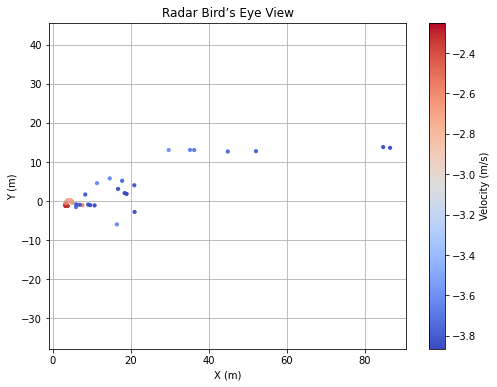

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

FILE = "/home/nupdm/Datasets/nuPDM/routes_training/route_route0_routes_training_date_04_25_10_55_52/RADAR_FRONT/0073.bin"

# open bin file
pcd = np.fromfile(FILE, dtype=np.float32)
pcd = pcd.reshape(-1, 4)

print(pcd.shape)

# following data are given in radians
range = pcd[:, 0]
altitude = pcd[:, 1]
azimuth = pcd[:, 2] # this is in meters
velocity = pcd[:, 3] # this is in m/s
# convert to x, y, z
x = range * np.cos(azimuth)
y = range * np.sin(azimuth)

# print altitude
print(f"Altitude min: {np.min(altitude)}")
print(f"Altitude max: {np.max(altitude)}")

# print azimuth
print(f"Azimuth min: {np.min(azimuth)}")
print(f"Azimuth max: {np.max(azimuth)}")

# print range
print(f"Range min: {np.min(range)}")
print(f"Range max: {np.max(range)}")

plt.figure(figsize=(8, 6))
sc = plt.scatter(x, y, c=velocity, cmap='coolwarm', s=10)  # Coloreado por velocidad
plt.colorbar(sc, label='Velocity (m/s)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Radar Bird’s Eye View')
plt.axis('equal')
plt.grid(True)
plt.show()

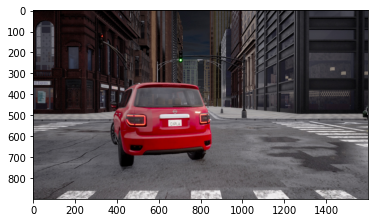

In [19]:
# project to image

IMAGE = "/home/nupdm/Datasets/nuPDM/routes_training/route_route0_routes_training_date_04_25_10_55_52/CAM_FRONT/0073.jpg"

# load and show image

img = cv2.imread(IMAGE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
# import nuscenes
from nuscenes.nuscenes import NuScenes
import numpy as np

DATAPATH = "/home/nupdm/Datasets/nuscenes"

# load nuscenes mini
nusc = NuScenes(version='v1.0-mini', dataroot=DATAPATH, verbose=False)

# check radars traslations
scene = nusc.scene[0]

sensor_calibrations = {}

sample_token = scene['first_sample_token']

sample = nusc.get('sample', sample_token)

for sensor_channel, sd_token in sample['data'].items():
    sd_record = nusc.get('sample_data', sd_token)

    calibrated_sensor = nusc.get('calibrated_sensor', sd_record['calibrated_sensor_token'])

    if sensor_channel not in sensor_calibrations:
        sensor_calibrations[sensor_channel] = {
            'translation': np.array(calibrated_sensor['translation']),
            'rotation': np.array(calibrated_sensor['rotation'])
        }

print("Calibración (Traslación y Rotación) de los sensores en coordenadas del ego:")
print("---")
for channel, calib_data in sensor_calibrations.items():
    print(f"Sensor: {channel}")
    print(f"  Traslación respecto al Ego (X, Y, Z): {calib_data['translation']}")
    # rotation from quaternion to euler angles
    rotation = calib_data['rotation']
    euler_angles = np.array([
        np.arctan2(2*(rotation[0]*rotation[1] + rotation[2]*rotation[3]), 1 - 2*(rotation[1]**2 + rotation[2]**2)),
        np.arcsin(2*(rotation[0]*rotation[2] - rotation[3]*rotation[1])),
        np.arctan2(2*(rotation[0]*rotation[3] + rotation[1]*rotation[2]), 1 - 2*(rotation[2]**2 + rotation[3]**2))
    ])
    print(f"  Rotación (Euler Angles, radianes): {euler_angles}")
    print("---")

Calibración (Traslación y Rotación) de los sensores en coordenadas del ego:
---
Sensor: RADAR_FRONT
  Traslación respecto al Ego (X, Y, Z): [3.412 0.    0.5  ]
  Rotación (Euler Angles, radianes): [0.         0.         0.00349066]
---
Sensor: RADAR_FRONT_LEFT
  Traslación respecto al Ego (X, Y, Z): [2.422 0.8   0.78 ]
  Rotación (Euler Angles, radianes): [0.         0.         1.54217293]
---
Sensor: RADAR_FRONT_RIGHT
  Traslación respecto al Ego (X, Y, Z): [ 2.422 -0.8    0.77 ]
  Rotación (Euler Angles, radianes): [ 0.          0.         -1.58790055]
---
Sensor: RADAR_BACK_LEFT
  Traslación respecto al Ego (X, Y, Z): [-0.562  0.628  0.53 ]
  Rotación (Euler Angles, radianes): [0.         0.         3.04402875]
---
Sensor: RADAR_BACK_RIGHT
  Traslación respecto al Ego (X, Y, Z): [-0.562 -0.618  0.53 ]
  Rotación (Euler Angles, radianes): [ 0.          0.         -3.07369935]
---
Sensor: LIDAR_TOP
  Traslación respecto al Ego (X, Y, Z): [0.943713 0.       1.84023 ]
  Rotación (Euler 